In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [28]:
data_train_path = r'C:\Face Recognition Dataset\train'
data_test_path = r'C:\Face Recognition Dataset\test'
data_validation_path = r'C:\Face Recognition Dataset\validation'

In [29]:
img_width = 48 
img_height = 48

In [38]:
data_train = tf.keras.utils.image_dataset_from_directory(
data_train_path,
shuffle = True,
image_size = (img_width, img_height),
batch_size = 64,
validation_split = False,
color_mode='grayscale',
labels='inferred', 
)

Found 28709 files belonging to 7 classes.


In [39]:
data_validation = tf.keras.utils.image_dataset_from_directory(
data_validation_path,
shuffle = True,
image_size = (img_width, img_height),
batch_size = 64,
validation_split = False,
color_mode='grayscale',
labels='inferred',     
)

Found 7066 files belonging to 7 classes.


In [40]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
shuffle = True,
image_size = (img_width, img_height),
batch_size = 64,
validation_split = False,
color_mode='grayscale',
labels='inferred', 
)

Found 7178 files belonging to 7 classes.


In [42]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))          

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))


In [49]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [50]:
data_train = data_train.repeat()

model_info = model.fit(
    data_train,
    steps_per_epoch=28709//64,
    epochs=50,
    validation_data=data_validation,
    validation_steps=7066//64,
    verbose=1
)

Epoch 1/50
448/448 [==============================] - 88s 194ms/step - loss: 1.1455 - accuracy: 0.5641 - val_loss: 1.0581 - val_accuracy: 0.5993
Epoch 2/50
448/448 [==============================] - 92s 205ms/step - loss: 1.0985 - accuracy: 0.5827 - val_loss: 1.0253 - val_accuracy: 0.6170
Epoch 3/50
448/448 [==============================] - 90s 202ms/step - loss: 1.0625 - accuracy: 0.5940 - val_loss: 0.9865 - val_accuracy: 0.6313
Epoch 4/50
448/448 [==============================] - 93s 208ms/step - loss: 1.0250 - accuracy: 0.6130 - val_loss: 0.9483 - val_accuracy: 0.6516
Epoch 5/50
448/448 [==============================] - 90s 202ms/step - loss: 0.9931 - accuracy: 0.6262 - val_loss: 0.9097 - val_accuracy: 0.6687
Epoch 6/50
448/448 [==============================] - 88s 196ms/step - loss: 0.9508 - accuracy: 0.6403 - val_loss: 0.8679 - val_accuracy: 0.6905
Epoch 7/50
448/448 [==============================] - 88s 197ms/step - loss: 0.9064 - accuracy: 0.6593 - val_loss: 0.8144 - val_ac

In [51]:
model_json = model.to_json()
with open('emotion_model3.json','w') as json_file:
    json_file.write(model_json)

In [52]:
model.save_weights('emotion_model3.h5')

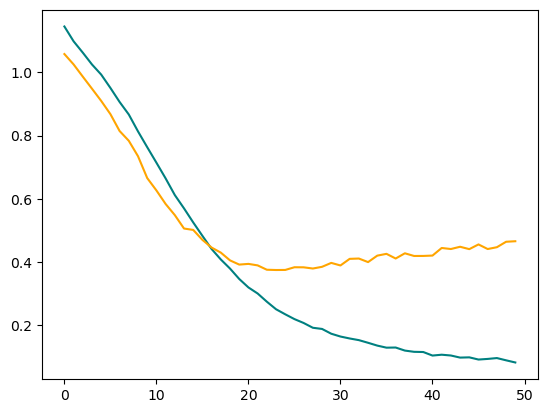

In [53]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(model_info.history['loss'], color='teal', label='accuracy')
plt.plot(model_info.history["val_loss"], color='orange', label='val_accuracy')
fig.suptitle=('Loss')
plt.show()

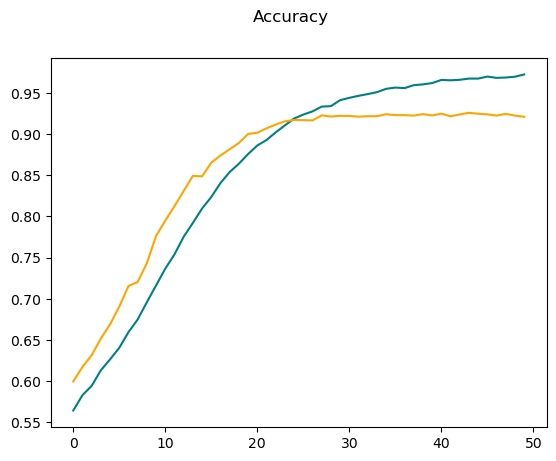

In [54]:
fig = plt.figure()
plt.plot(model_info.history['accuracy'], color='teal', label='accuracy')
plt.plot(model_info.history["val_accuracy"], color='orange', label='val_accuracy')
fig.suptitle('Accuracy')
plt.show()

In [4]:
import os
import cv2
import numpy as np
import tensorflow as tf

In [5]:
import os
import cv2
import numpy as np
from keras.models import load_model
from keras.models import model_from_json

json_file=open(r'C:\Users\Hassa\emotion_model.json','r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights(r'C:\Users\Hassa\emotion_model.h5')

data_test_path =  r'C:\Face Recognition Dataset\test\Sad'

emotion_dic = {0:'Angry',1:'Disgusted',2:'Fearful',3:'Happy',4:'Neutral',5:'Sad',6:'Surprised'}
wrong_predictions_count = 0
total_files = 0

for filename in os.listdir(data_test_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        total_files += 1
        image_path = os.path.join(data_test_path, filename)
        image = cv2.imread(image_path)
        

        image = cv2.resize(image, (48, 48))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = image.astype('float32') / 255.0
        image = np.expand_dims(image, axis=(0, -1)) 
        
   
        predictions = model.predict(image)
        

        predicted_class = np.argmax(predictions)
        score = tf.nn.softmax(predictions)

        print("Image",filename,"is",emotion_dic[predicted_class],"with accuracy of",np.max(score*100),"\n")
        if predicted_class != 5:  # Assuming class 5 corresponds to 'Sad'
            wrong_predictions_count += 1
            
prediction_accuracy = (total_files - wrong_predictions_count) / total_files * 100
print("Number of wrong predictions:", wrong_predictions_count)
print("Prediction accuracy:", prediction_accuracy, "%")

1/1 [==============================] - 0s 100ms/step
Image PrivateTest_10247676.jpg is Sad with accuracy of 16.860395 

1/1 [==============================] - 0s 30ms/step
Image PrivateTest_10455506.jpg is Sad with accuracy of 28.810253 

1/1 [==============================] - 0s 30ms/step
Image PrivateTest_10658656.jpg is Surprised with accuracy of 23.622765 

1/1 [==============================] - 0s 28ms/step
Image PrivateTest_10702106.jpg is Sad with accuracy of 27.6523 

1/1 [==============================] - 0s 27ms/step
Image PrivateTest_10814167.jpg is Sad with accuracy of 20.235323 

1/1 [==============================] - 0s 32ms/step
Image PrivateTest_11080550.jpg is Sad with accuracy of 26.145887 

1/1 [==============================] - 0s 32ms/step
Image PrivateTest_11127811.jpg is Happy with accuracy of 27.36568 

1/1 [==============================] - 0s 31ms/step
Image PrivateTest_11149326.jpg is Angry with accuracy of 25.582233 

1/1 [==============================] - 0

1/1 [==============================] - 0s 30ms/step
Image PrivateTest_21188058.jpg is Sad with accuracy of 17.423616 

1/1 [==============================] - 0s 26ms/step
Image PrivateTest_21378170.jpg is Sad with accuracy of 22.225256 

1/1 [==============================] - 0s 30ms/step
Image PrivateTest_21379308.jpg is Sad with accuracy of 24.66777 

1/1 [==============================] - 0s 23ms/step
Image PrivateTest_21734160.jpg is Sad with accuracy of 26.367538 

1/1 [==============================] - 0s 23ms/step
Image PrivateTest_21760566.jpg is Happy with accuracy of 19.25584 

1/1 [==============================] - 0s 25ms/step
Image PrivateTest_2202708.jpg is Happy with accuracy of 16.602144 

1/1 [==============================] - 0s 29ms/step
Image PrivateTest_22191391.jpg is Sad with accuracy of 21.705519 

1/1 [==============================] - 0s 25ms/step
Image PrivateTest_22199939.jpg is Happy with accuracy of 20.749323 

1/1 [==============================] - 0s 24m

1/1 [==============================] - 0s 32ms/step
Image PrivateTest_30128077.jpg is Fearful with accuracy of 20.742428 

1/1 [==============================] - 0s 25ms/step
Image PrivateTest_30137315.jpg is Sad with accuracy of 22.249949 

1/1 [==============================] - 0s 28ms/step
Image PrivateTest_3019695.jpg is Neutral with accuracy of 31.176292 

1/1 [==============================] - 0s 24ms/step
Image PrivateTest_30347635.jpg is Sad with accuracy of 25.281006 

1/1 [==============================] - 0s 30ms/step
Image PrivateTest_30396990.jpg is Sad with accuracy of 28.156805 

1/1 [==============================] - 0s 31ms/step
Image PrivateTest_3062720.jpg is Sad with accuracy of 21.259789 

1/1 [==============================] - 0s 28ms/step
Image PrivateTest_30726678.jpg is Angry with accuracy of 30.952839 

1/1 [==============================] - 0s 29ms/step
Image PrivateTest_31227186.jpg is Angry with accuracy of 20.20908 

1/1 [==============================] - 

1/1 [==============================] - 0s 23ms/step
Image PrivateTest_38531368.jpg is Sad with accuracy of 30.362453 

1/1 [==============================] - 0s 26ms/step
Image PrivateTest_38749222.jpg is Sad with accuracy of 25.371433 

1/1 [==============================] - 0s 25ms/step
Image PrivateTest_38870366.jpg is Sad with accuracy of 30.86482 

1/1 [==============================] - 0s 25ms/step
Image PrivateTest_38876900.jpg is Fearful with accuracy of 17.756372 

1/1 [==============================] - 0s 28ms/step
Image PrivateTest_39077944.jpg is Happy with accuracy of 25.373777 

1/1 [==============================] - 0s 26ms/step
Image PrivateTest_39390601.jpg is Fearful with accuracy of 18.822016 

1/1 [==============================] - 0s 30ms/step
Image PrivateTest_39577079.jpg is Sad with accuracy of 19.736738 

1/1 [==============================] - 0s 29ms/step
Image PrivateTest_39693209.jpg is Fearful with accuracy of 20.384907 

1/1 [==============================

1/1 [==============================] - 0s 32ms/step
Image PrivateTest_51237975.jpg is Sad with accuracy of 29.408281 

1/1 [==============================] - 0s 33ms/step
Image PrivateTest_51679046.jpg is Sad with accuracy of 26.639261 

1/1 [==============================] - 0s 31ms/step
Image PrivateTest_51709643.jpg is Fearful with accuracy of 22.507404 

1/1 [==============================] - 0s 33ms/step
Image PrivateTest_51713257.jpg is Sad with accuracy of 16.227453 

1/1 [==============================] - 0s 31ms/step
Image PrivateTest_51930291.jpg is Happy with accuracy of 26.15946 

1/1 [==============================] - 0s 29ms/step
Image PrivateTest_52350274.jpg is Angry with accuracy of 28.036325 

1/1 [==============================] - 0s 32ms/step
Image PrivateTest_52351303.jpg is Sad with accuracy of 30.929752 

1/1 [==============================] - 0s 32ms/step
Image PrivateTest_52381983.jpg is Sad with accuracy of 29.948156 

1/1 [==============================] - 0s

1/1 [==============================] - 0s 30ms/step
Image PrivateTest_60524578.jpg is Sad with accuracy of 29.465427 

1/1 [==============================] - 0s 28ms/step
Image PrivateTest_60567139.jpg is Neutral with accuracy of 23.00211 

1/1 [==============================] - 0s 32ms/step
Image PrivateTest_6060400.jpg is Neutral with accuracy of 26.654858 

1/1 [==============================] - 0s 28ms/step
Image PrivateTest_60802329.jpg is Fearful with accuracy of 21.156673 

1/1 [==============================] - 0s 33ms/step
Image PrivateTest_60808439.jpg is Happy with accuracy of 29.237587 

1/1 [==============================] - 0s 32ms/step
Image PrivateTest_60912473.jpg is Sad with accuracy of 25.701178 

1/1 [==============================] - 0s 30ms/step
Image PrivateTest_60953134.jpg is Sad with accuracy of 18.365248 

1/1 [==============================] - 0s 29ms/step
Image PrivateTest_61085907.jpg is Sad with accuracy of 24.500605 

1/1 [==============================]

1/1 [==============================] - 0s 27ms/step
Image PrivateTest_70796670.jpg is Surprised with accuracy of 22.59051 

1/1 [==============================] - 0s 29ms/step
Image PrivateTest_70820178.jpg is Neutral with accuracy of 30.967989 

1/1 [==============================] - 0s 30ms/step
Image PrivateTest_70820261.jpg is Neutral with accuracy of 20.13972 

1/1 [==============================] - 0s 31ms/step
Image PrivateTest_70891842.jpg is Sad with accuracy of 31.040895 

1/1 [==============================] - 0s 28ms/step
Image PrivateTest_709416.jpg is Neutral with accuracy of 19.150106 

1/1 [==============================] - 0s 28ms/step
Image PrivateTest_7134876.jpg is Neutral with accuracy of 19.308876 

1/1 [==============================] - 0s 25ms/step
Image PrivateTest_71620539.jpg is Sad with accuracy of 26.462263 

1/1 [==============================] - 0s 24ms/step
Image PrivateTest_71713293.jpg is Angry with accuracy of 22.496185 

1/1 [========================

1/1 [==============================] - 0s 24ms/step
Image PrivateTest_79875766.jpg is Sad with accuracy of 20.939432 

1/1 [==============================] - 0s 32ms/step
Image PrivateTest_79979511.jpg is Angry with accuracy of 21.48958 

1/1 [==============================] - 0s 32ms/step
Image PrivateTest_79985549.jpg is Sad with accuracy of 19.91068 

1/1 [==============================] - 0s 32ms/step
Image PrivateTest_80214908.jpg is Angry with accuracy of 21.75108 

1/1 [==============================] - 0s 31ms/step
Image PrivateTest_80310868.jpg is Happy with accuracy of 20.286999 

1/1 [==============================] - 0s 30ms/step
Image PrivateTest_80346458.jpg is Sad with accuracy of 24.359821 

1/1 [==============================] - 0s 25ms/step
Image PrivateTest_8044870.jpg is Angry with accuracy of 19.10588 

1/1 [==============================] - 0s 32ms/step
Image PrivateTest_80785220.jpg is Sad with accuracy of 22.428143 

1/1 [==============================] - 0s 32m

1/1 [==============================] - 0s 33ms/step
Image PrivateTest_92008041.jpg is Angry with accuracy of 25.577608 

1/1 [==============================] - 0s 29ms/step
Image PrivateTest_92062027.jpg is Angry with accuracy of 17.512728 

1/1 [==============================] - 0s 29ms/step
Image PrivateTest_92077958.jpg is Sad with accuracy of 23.588634 

1/1 [==============================] - 0s 26ms/step
Image PrivateTest_92202830.jpg is Sad with accuracy of 30.9445 

1/1 [==============================] - 0s 24ms/step
Image PrivateTest_92287987.jpg is Sad with accuracy of 21.308975 

1/1 [==============================] - 0s 24ms/step
Image PrivateTest_92593957.jpg is Happy with accuracy of 21.033045 

1/1 [==============================] - 0s 30ms/step
Image PrivateTest_92794448.jpg is Happy with accuracy of 22.33076 

1/1 [==============================] - 0s 31ms/step
Image PrivateTest_92827143.jpg is Happy with accuracy of 18.61984 

1/1 [==============================] - 0s 

1/1 [==============================] - 0s 31ms/step
Image PublicTest_13680376.jpg is Sad with accuracy of 28.055716 

1/1 [==============================] - 0s 31ms/step
Image PublicTest_13725132.jpg is Sad with accuracy of 30.595806 

1/1 [==============================] - 0s 30ms/step
Image PublicTest_13830262.jpg is Neutral with accuracy of 29.042906 

1/1 [==============================] - 0s 31ms/step
Image PublicTest_14008187.jpg is Sad with accuracy of 31.092373 

1/1 [==============================] - 0s 30ms/step
Image PublicTest_14406911.jpg is Happy with accuracy of 26.74473 

1/1 [==============================] - 0s 33ms/step
Image PublicTest_14475126.jpg is Neutral with accuracy of 30.725533 

1/1 [==============================] - 0s 34ms/step
Image PublicTest_14489755.jpg is Neutral with accuracy of 24.793978 

1/1 [==============================] - 0s 29ms/step
Image PublicTest_14591455.jpg is Happy with accuracy of 27.58344 

1/1 [==============================] - 0s 

1/1 [==============================] - 0s 30ms/step
Image PublicTest_23286340.jpg is Sad with accuracy of 17.786606 

1/1 [==============================] - 0s 29ms/step
Image PublicTest_23355730.jpg is Sad with accuracy of 24.71798 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_23586952.jpg is Fearful with accuracy of 21.01949 

1/1 [==============================] - 0s 26ms/step
Image PublicTest_23705098.jpg is Neutral with accuracy of 21.718079 

1/1 [==============================] - 0s 27ms/step
Image PublicTest_23782142.jpg is Sad with accuracy of 21.648432 

1/1 [==============================] - 0s 25ms/step
Image PublicTest_23931269.jpg is Neutral with accuracy of 18.67997 

1/1 [==============================] - 0s 28ms/step
Image PublicTest_23975491.jpg is Sad with accuracy of 28.24718 

1/1 [==============================] - 0s 32ms/step
Image PublicTest_24118890.jpg is Sad with accuracy of 23.587671 

1/1 [==============================] - 0s 31ms/s

1/1 [==============================] - 0s 32ms/step
Image PublicTest_31756938.jpg is Neutral with accuracy of 19.633535 

1/1 [==============================] - 0s 26ms/step
Image PublicTest_31832699.jpg is Neutral with accuracy of 17.558372 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_31882260.jpg is Sad with accuracy of 30.364954 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_32322308.jpg is Sad with accuracy of 29.726713 

1/1 [==============================] - 0s 25ms/step
Image PublicTest_32644585.jpg is Neutral with accuracy of 30.996614 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_32730155.jpg is Sad with accuracy of 28.811052 

1/1 [==============================] - 0s 29ms/step
Image PublicTest_32829892.jpg is Happy with accuracy of 21.061607 

1/1 [==============================] - 0s 28ms/step
Image PublicTest_32923630.jpg is Sad with accuracy of 24.698452 

1/1 [==============================] - 0s 

1/1 [==============================] - 0s 28ms/step
Image PublicTest_40599442.jpg is Sad with accuracy of 19.94411 

1/1 [==============================] - 0s 27ms/step
Image PublicTest_40637892.jpg is Angry with accuracy of 18.118435 

1/1 [==============================] - 0s 26ms/step
Image PublicTest_40686855.jpg is Neutral with accuracy of 25.22413 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_40834308.jpg is Sad with accuracy of 21.209066 

1/1 [==============================] - 0s 23ms/step
Image PublicTest_4084269.jpg is Neutral with accuracy of 23.526726 

1/1 [==============================] - 0s 27ms/step
Image PublicTest_40857959.jpg is Sad with accuracy of 27.811176 

1/1 [==============================] - 0s 28ms/step
Image PublicTest_41091993.jpg is Angry with accuracy of 17.836168 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_41127334.jpg is Neutral with accuracy of 23.874443 

1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 29ms/step
Image PublicTest_5084106.jpg is Sad with accuracy of 16.608864 

1/1 [==============================] - 0s 29ms/step
Image PublicTest_50867484.jpg is Sad with accuracy of 30.74796 

1/1 [==============================] - 0s 27ms/step
Image PublicTest_50905235.jpg is Angry with accuracy of 25.357664 

1/1 [==============================] - 0s 25ms/step
Image PublicTest_50927771.jpg is Neutral with accuracy of 18.555721 

1/1 [==============================] - 0s 27ms/step
Image PublicTest_50942295.jpg is Sad with accuracy of 21.39957 

1/1 [==============================] - 0s 36ms/step
Image PublicTest_50982536.jpg is Sad with accuracy of 27.048216 

1/1 [==============================] - 0s 28ms/step
Image PublicTest_51178509.jpg is Neutral with accuracy of 20.0592 

1/1 [==============================] - 0s 30ms/step
Image PublicTest_5122477.jpg is Fearful with accuracy of 19.04087 

1/1 [==============================] - 0s 29ms/st

1/1 [==============================] - 0s 33ms/step
Image PublicTest_59813906.jpg is Sad with accuracy of 22.504032 

1/1 [==============================] - 0s 33ms/step
Image PublicTest_59816922.jpg is Angry with accuracy of 20.29133 

1/1 [==============================] - 0s 31ms/step
Image PublicTest_60061352.jpg is Sad with accuracy of 30.101542 

1/1 [==============================] - 0s 30ms/step
Image PublicTest_60393961.jpg is Sad with accuracy of 25.440983 

1/1 [==============================] - 0s 31ms/step
Image PublicTest_60414831.jpg is Angry with accuracy of 23.517221 

1/1 [==============================] - 0s 32ms/step
Image PublicTest_60435499.jpg is Neutral with accuracy of 22.533339 

1/1 [==============================] - 0s 35ms/step
Image PublicTest_60510521.jpg is Neutral with accuracy of 23.312542 

1/1 [==============================] - 0s 31ms/step
Image PublicTest_60589560.jpg is Angry with accuracy of 28.071447 

1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 29ms/step
Image PublicTest_69913046.jpg is Sad with accuracy of 31.118763 

1/1 [==============================] - 0s 23ms/step
Image PublicTest_70050084.jpg is Fearful with accuracy of 17.661331 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_70106735.jpg is Happy with accuracy of 18.546135 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_70184109.jpg is Neutral with accuracy of 17.87639 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_70324919.jpg is Angry with accuracy of 23.131762 

1/1 [==============================] - 0s 23ms/step
Image PublicTest_70410925.jpg is Happy with accuracy of 22.031195 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_70551961.jpg is Angry with accuracy of 19.770628 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_70684673.jpg is Neutral with accuracy of 30.65325 

1/1 [==============================] -

1/1 [==============================] - 0s 24ms/step
Image PublicTest_81022074.jpg is Sad with accuracy of 30.074266 

1/1 [==============================] - 0s 29ms/step
Image PublicTest_81050616.jpg is Sad with accuracy of 25.777933 

1/1 [==============================] - 0s 28ms/step
Image PublicTest_81549573.jpg is Sad with accuracy of 20.602343 

1/1 [==============================] - 0s 30ms/step
Image PublicTest_81609364.jpg is Sad with accuracy of 28.71364 

1/1 [==============================] - 0s 30ms/step
Image PublicTest_81677219.jpg is Surprised with accuracy of 20.699356 

1/1 [==============================] - 0s 30ms/step
Image PublicTest_81975497.jpg is Happy with accuracy of 26.44691 

1/1 [==============================] - 0s 25ms/step
Image PublicTest_81978061.jpg is Angry with accuracy of 20.068996 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_82355488.jpg is Angry with accuracy of 29.779676 

1/1 [==============================] - 0s 24ms

1/1 [==============================] - 0s 32ms/step
Image PublicTest_89937847.jpg is Sad with accuracy of 19.65209 

1/1 [==============================] - 0s 34ms/step
Image PublicTest_90195753.jpg is Neutral with accuracy of 25.985151 

1/1 [==============================] - 0s 26ms/step
Image PublicTest_90237200.jpg is Sad with accuracy of 19.838215 

1/1 [==============================] - 0s 27ms/step
Image PublicTest_90376986.jpg is Angry with accuracy of 18.664064 

1/1 [==============================] - 0s 31ms/step
Image PublicTest_90402522.jpg is Angry with accuracy of 17.983522 

1/1 [==============================] - 0s 32ms/step
Image PublicTest_90423571.jpg is Neutral with accuracy of 27.270237 

1/1 [==============================] - 0s 32ms/step
Image PublicTest_90433770.jpg is Angry with accuracy of 25.076183 

1/1 [==============================] - 0s 30ms/step
Image PublicTest_90439656.jpg is Neutral with accuracy of 19.577845 

1/1 [==============================] - 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_9847816.jpg is Sad with accuracy of 19.606224 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_98681138.jpg is Sad with accuracy of 28.93913 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_98736341.jpg is Sad with accuracy of 28.664505 

1/1 [==============================] - 0s 24ms/step
Image PublicTest_98833450.jpg is Neutral with accuracy of 29.62587 

1/1 [==============================] - 0s 25ms/step
Image PublicTest_99116679.jpg is Happy with accuracy of 31.058979 

1/1 [==============================] - 0s 25ms/step
Image PublicTest_99123958.jpg is Sad with accuracy of 16.130676 

1/1 [==============================] - 0s 26ms/step
Image PublicTest_99393604.jpg is Happy with accuracy of 18.283895 

1/1 [==============================] - 0s 26ms/step
Image PublicTest_99446207.jpg is Neutral with accuracy of 23.464233 

1/1 [==============================] - 0s 25ms/